In [1]:
# -- PyBer_Challenge

# -- Refactored and consolidated code throughout for a cleaner file. 
# -- Total Cells reduced to 3.

# -- Importing and loading dependencies, loading files,
#    and creating data frames from csv files. 

# Add Matplotlib inline magic command.
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import os 

# -- Importing style for Matplotlib.
#    Resource: https://www.dataquest.io/blog/making-538-plots/ 
import matplotlib.style as style

# Files to load -- Using os.path.join to avoid "/" or "\" errors.
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

# Read the city and ride data files and store them in a pandas DataFrame each.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [4]:
# --- Challenge Part 1: Create a PyBer Summary DataFrame

# -- Creating the Pyber Summary DataFrame that showcases the following
#    for each city type: 
#        - Total Rides 
#        - Total Drivers 
#        - Total Fares 
#        - Average Fare Per Ride, 
#        - Average Fare per Driver 


# Combining the data into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# -- Creating lists for dictionary to create dataframe.

# -- Using GroupBy function to pull desired data and applying functions
#    to create Lists for dataframe:
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

# -- Calculating average Fare per Ride and average Fare
#    per Driver by City Type.
average_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
average_driver_fare = total_fares / total_driver_count

# -- Creating dataframe from dictionary of above lists:
#    Resource: https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/ 
pyber_summary_df = pd.DataFrame({
        "Total Rides": total_ride_count,
        "Total Drivers": total_driver_count,
        "Total Fares": total_fares,
        "Average Fare per Ride": average_fare,
        "Average Fare per Driver": average_driver_fare
       })

# -- Formatting Pyber Summary Dataframe.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# -- Removing the index name City Type from dataframe.
pyber_summary_df.index.name = None

# -- Display Dataframe.
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


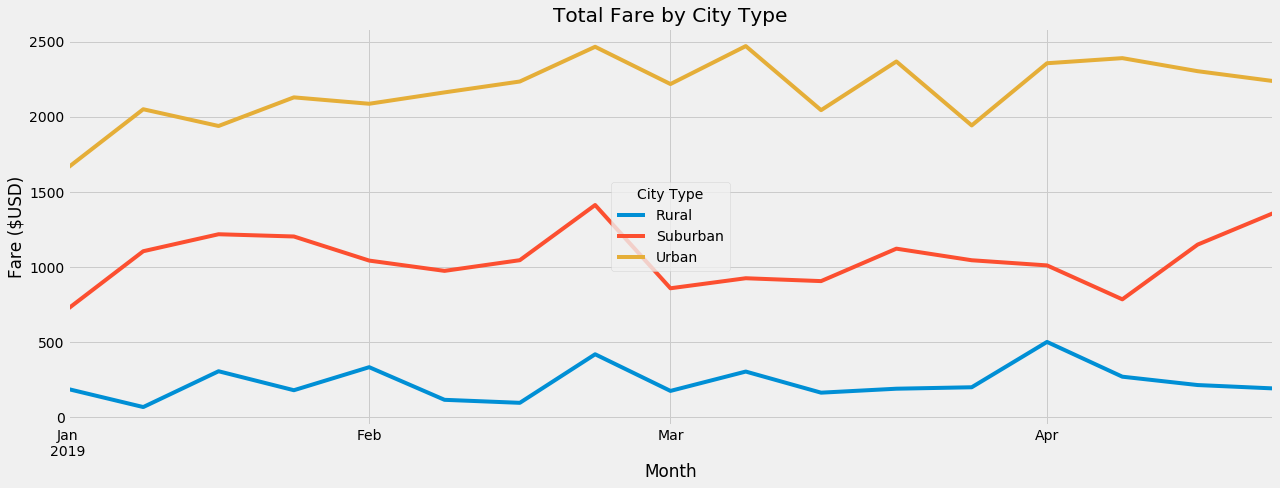

In [5]:
# --- Challenge Part 2: Create a Multiple-Line Plot for the 
#     Sum of the Fares for Each City Type

# -- (Step 1) Renaming columns for merged PyBer dataframe.
#    Resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
pyber_data_df = pyber_data_df.rename(columns = {
    'city': 'City', 
    'date':'Date',
    'fare':'Fare', 
    'ride_id': 'Ride Id',
    'driver_count': 'No. Drivers', 
    'type':'City Type'
})

# -- (Step 2) Setting index of data to Date Column.
pyber_data_df = pyber_data_df.set_index(['Date'])

# -- (Step 3) Using Copy function to create new dataframe for Fares
#    Resource: https://stackoverflow.com/questions/36518027/pandas-creating-new-data-frame-from-only-certain-columns/36518229 
fares_by_city_df = pd.DataFrame((pyber_data_df[["City Type", "Fare"]]).copy())

# -- (Step 4) NOTE: Found that I didn't need to use the function to Drop Column for 
#    there was not an extra Date column to remove after creating the dataframe.
# fares_by_city_df.drop(columns = ["index"])

# -- (Step 5) Setting index to Datetime datatype.
#    Resource: https://stackoverflow.com/questions/40815238/python-pandas-convert-index-to-datetime 
fares_by_city_df.index = pd.to_datetime(fares_by_city_df.index)

# -- (Step 6) Check dataframe using info method to verify datetime data type.
#    NOTE: Commented out to keep output display cleaner.
# fares_by_city_df.info()

# -- (Step 7) Calculating the Sum of Fares by Type of City and Date
#    and creating a new data frame.
fares_by_city_type_df = pd.DataFrame(fares_by_city_df.groupby(["City Type"]).sum()["Fare"])

# -- (Step 8) Resetting index, required for future dataframe.
#    Resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html 
fares_by_city_type_df = fares_by_city_type_df.reset_index()

# -- (Step 9) Creating a pivot table dataframe with required index (Date)
#    and columns (City Type), with Fare for each Date appearing in
#    each row. Note: NaN values will appear in most rows, but will
#    not affect sum calculations.
#    Resource: https://www.geeksforgeeks.org/python-pandas-pivot_table/ 
fares_pivot_df = pd.pivot_table(fares_by_city_df, index = ["Date"], columns = ["City Type"])

# -- (Step 10) Creating a new dataframe from previous pivot table between given
#    dates 2019-01-01 and 2019-04-28 using loc function. 
#    Resource: https://chrisalbon.com/machine_learning/preprocessing_dates_and_times/select_date_and_time_ranges/ 
date_range_pivot = pd.DataFrame(fares_pivot_df.loc['2019-01-01':'2019-04-28'])

# -- (Step 11) Creating a new dataframe by using resample function to create weekly bins
#    and calculating the sum of teh fares for each week.
#    Resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html 
weekly_fares = date_range_pivot.resample('W').sum()

# -- (Step 12) Plotting dataframe created from weekly data fares
#    to create final line chart. 

# -- Using imported graph style "fivethirtyeight".
#    Resource: https://www.dataquest.io/blog/making-538-plots/ 
style.use('fivethirtyeight') 

# -- Formatting chart size, title, and axis.
weekly_fares.plot(figsize=(18, 7))
plt.title("Total Fare by City Type")
plt.xlabel("Month")
plt.ylabel("Fare ($USD)")

# -- Formatting chart legend.
#    Resource: https://stackoverflow.com/questions/44620013/title-for-matplotlib-legend 
plt.legend(title="City Type", labels=["Rural", "Suburban", "Urban"], loc = "center")

# -- Tight Layout Fix, function provided by Matplotlib to keep labels.
#    from being cut off and to save entire image without missing details
#    Resource: https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot 
#    Resource: https://stackoverflow.com/questions/9603230/how-to-use-matplotlib-tight-layout-with-figure 
plt.tight_layout()

# Save the figure.
plt.savefig((os.path.join("analysis", "PyBer_Challenge_Fig.png")))

# Show the chart.
plt.show()